In [2]:
# Load needed packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = r'./CompleteWeatherCarbonAndOzoneData.csv'
data = pd.read_csv(file_path)

#### Hyptothesis 1: As greenhouse emissions in the US go up, so do the temperatures.

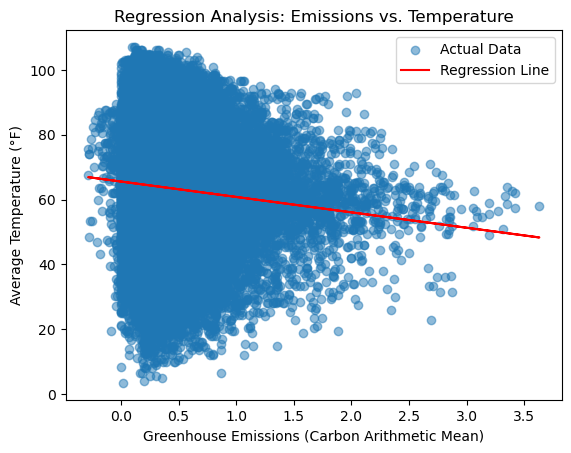

R-squared value: 0.0093330334365046


In [31]:
# Create an average temperature column
data['avg_temp'] = (data['tmax'] + data['tmin']) / 2

# Select relevant columns and drop rows with missing values
data_filtered = data[['Carbon Arithmetic Mean', 'avg_temp']].dropna()

# Split the data into features (X) and target (y)
X = data_filtered[['Carbon Arithmetic Mean']]
y = data_filtered['avg_temp']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared to assess the model
r2 = r2_score(y_test, y_pred)

# Plot the relationship and regression line
plt.scatter(X_test, y_test, label='Actual Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Greenhouse Emissions (Carbon Arithmetic Mean)')
plt.ylabel('Average Temperature (°F)')
plt.title('Regression Analysis: Emissions vs. Temperature')
plt.legend()
plt.show()

print(f"R-squared value: {r2}")


##### Refine Regression Analysis, and show Emission vs. Temperature over the years

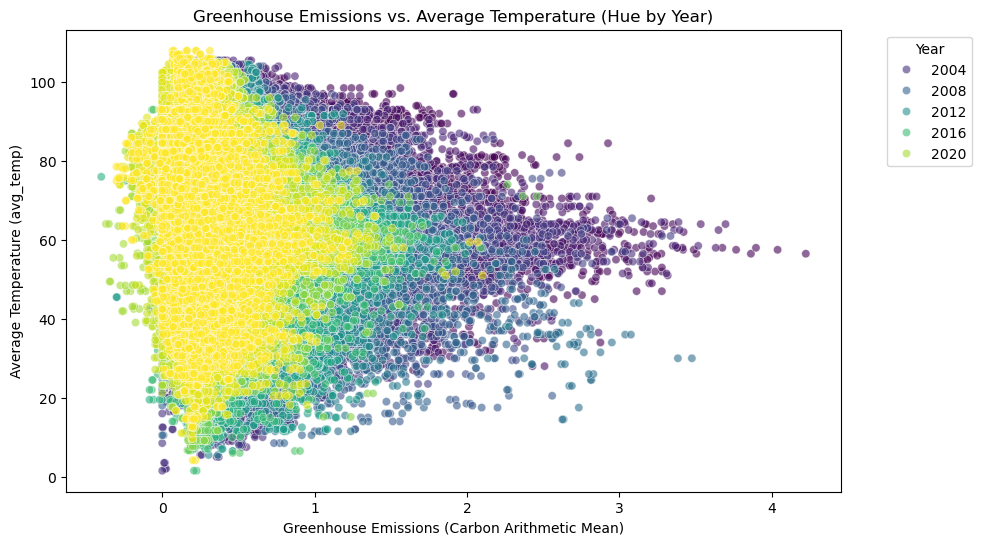

In [32]:
# Ensure the 'Date Local' column is in datetime format
data['Date Local'] = pd.to_datetime(data['Date Local'], errors='coerce')

# Extract the year from the 'Date Local' column
data['Year'] = data['Date Local'].dt.year

# Filter data to remove any rows with missing values in relevant columns
data_filtered_hue = data[['Carbon Arithmetic Mean', 'avg_temp', 'Year']].dropna()

# Create a scatterplot with hue based on the year
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_filtered_hue, 
    x='Carbon Arithmetic Mean', 
    y='avg_temp', 
    hue='Year', 
    palette='viridis', 
    alpha=0.6
)

plt.title('Greenhouse Emissions vs. Average Temperature (Hue by Year)')
plt.xlabel('Greenhouse Emissions (Carbon Arithmetic Mean)')
plt.ylabel('Average Temperature (avg_temp)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Extra

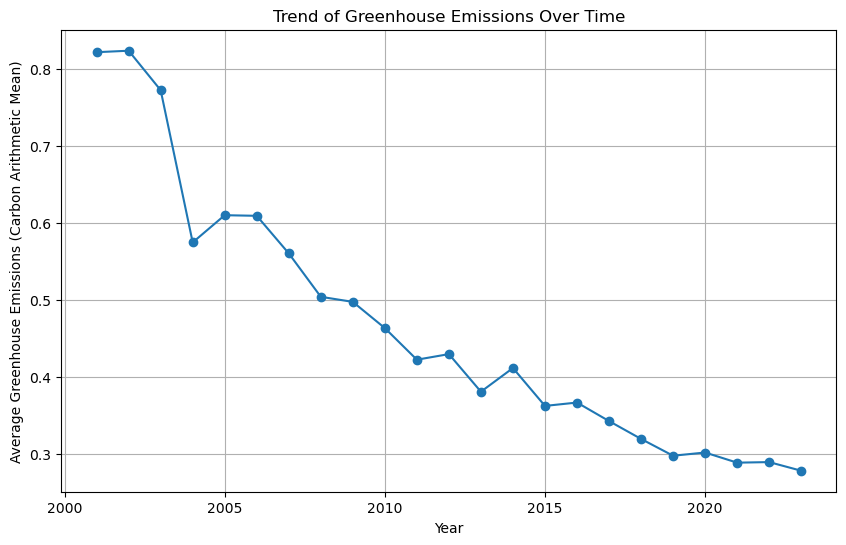

,Year,Carbon Arithmetic Mean
0,2001,0.821630
1,2002,0.823539
2,2003,0.772264
3,2004,0.574607
4,2005,0.609957


In [33]:
# Group the data by year and calculate the mean of greenhouse emissions
emissions_trend = data_filtered_hue.groupby('Year')['Carbon Arithmetic Mean'].mean().reset_index()

# Plot the trend of greenhouse emissions over time
plt.figure(figsize=(10, 6))
plt.plot(emissions_trend['Year'], emissions_trend['Carbon Arithmetic Mean'], marker='o', linestyle='-')
plt.title('Trend of Greenhouse Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Average Greenhouse Emissions (Carbon Arithmetic Mean)')
plt.grid(True)
plt.show()

emissions_trend.head()

##### Check on temperature trend

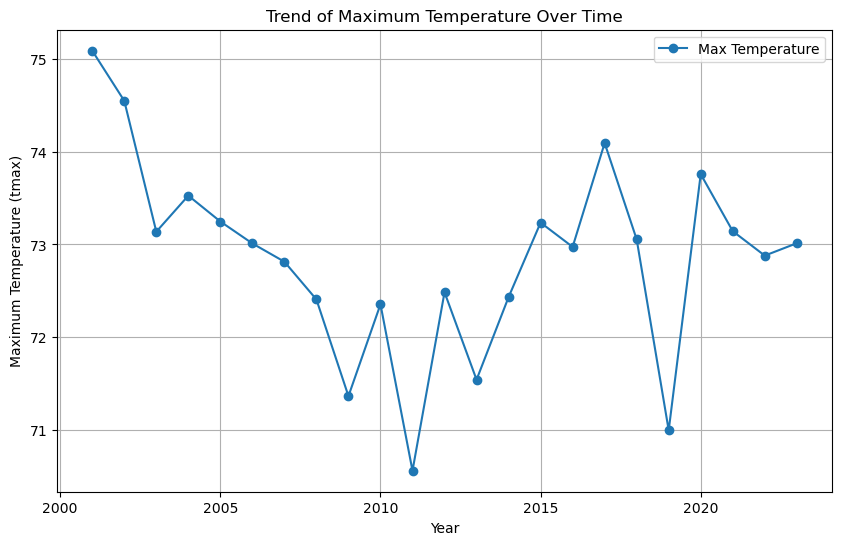

In [34]:
# Group the data by year and calculate the maximum temperature for each year
max_temp_trend = data.groupby('Year')['tmax'].mean().reset_index()

# Plot the trend of maximum temperature over time
plt.figure(figsize=(10, 6))
plt.plot(max_temp_trend['Year'], max_temp_trend['tmax'], marker='o', linestyle='-', label='Max Temperature')
plt.title('Trend of Maximum Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature (tmax)')
plt.grid(True)
plt.legend()
plt.show()

##### Koppen

In [35]:
# Define a mapping of states to their primary climate zones based on the Köppen classification
state_to_climate = {
    # Tropical
    "Hawaii": "Tropical",
    "Florida": "Tropical",
    # Arid/Desert
    "Arizona": "Arid",
    "Nevada": "Arid",
    "Utah": "Arid",
    "New Mexico": "Arid",
    "Texas": "Arid",
    # Temperate
    "California": "Temperate",
    "Oregon": "Temperate",
    "Washington": "Temperate",
    "North Carolina": "Temperate",
    "South Carolina": "Temperate",
    "Georgia": "Temperate",
    "Alabama": "Temperate",
    "Mississippi": "Temperate",
    "Louisiana": "Temperate",
    "Tennessee": "Temperate",
    "Virginia": "Temperate",
    # Continental
    "Illinois": "Continental",
    "Ohio": "Continental",
    "New York": "Continental",
    "Michigan": "Continental",
    "Pennsylvania": "Continental",
    "Minnesota": "Continental",
    "Wisconsin": "Continental",
    "Indiana": "Continental",
    "Massachusetts": "Continental",
    "Iowa": "Continental",
    # Alpine/Highland
    "Colorado": "Alpine",
    "Montana": "Alpine",
    "Idaho": "Alpine",
    "Wyoming": "Alpine",
    # Polar
    "Alaska": "Polar",
}

# Map states to climate zones
data['Climate Zone'] = data['State Name'].map(state_to_climate)

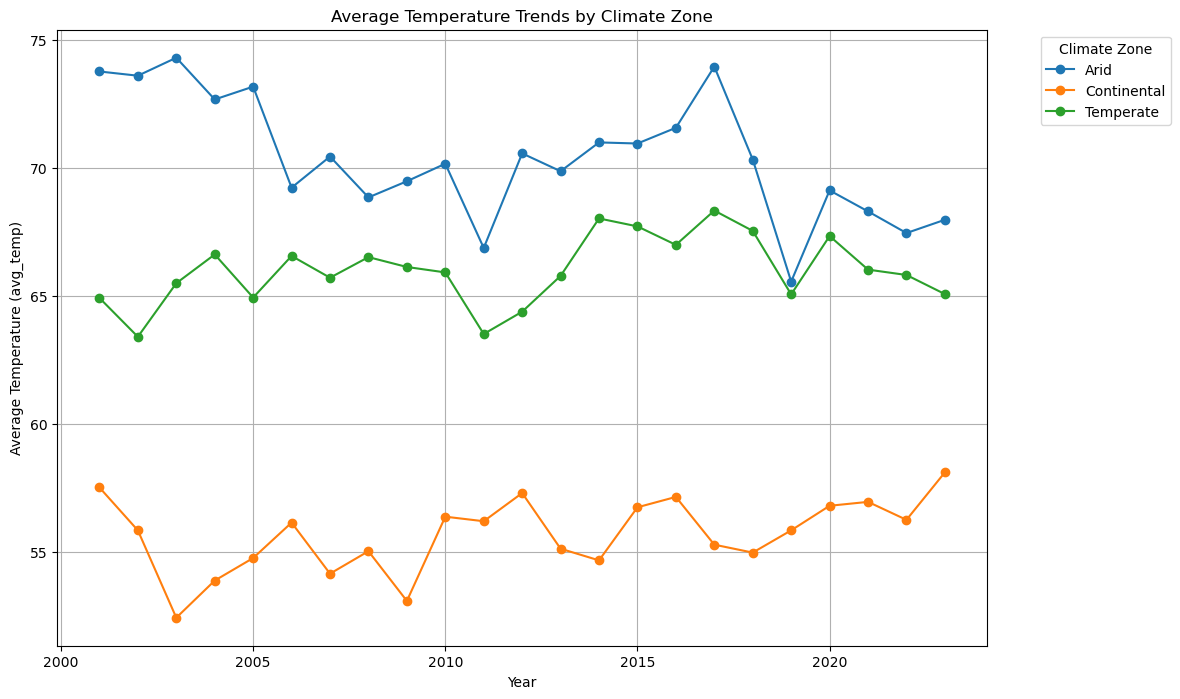

In [36]:
# Group by Climate Zone and Year, and calculate the mean average temperature
climate_zone_temp_trends = data.groupby(['Climate Zone', 'Year'])['avg_temp'].mean().reset_index()

# Pivot the data to make it easier to plot trends for each climate zone
climate_zone_temp_pivot = climate_zone_temp_trends.pivot(index='Year', columns='Climate Zone', values='avg_temp')

# Plot the temperature trends by climate zone
plt.figure(figsize=(12, 8))
climate_zone_temp_pivot.plot(ax=plt.gca(), marker='o')
plt.title('Average Temperature Trends by Climate Zone')
plt.xlabel('Year')
plt.ylabel('Average Temperature (avg_temp)')
plt.grid(True)
plt.legend(title='Climate Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()